# Data Visualisation
Mehman Ismayilli

July 2024

## Immigration to Canada

I engage a time series analysis of Immigration to Canada from 1980 to 2013.

The Dataset: Immigration to Canada from 1980 to 2013

Dataset Source: International migration flows to and from selected countries - The 2015 revision https://www.un.org/development/desa/pd/data/international-migration-flows.

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

This Analysis focuses on the Canadian immigration data.


In [1]:
# Import necessary libraries
import numpy as np #importing numpy library
import pandas as pd #importing pandas library

In [11]:
#To open the excel file here, make sure you install xlrd==2.0.1 and openpyxl
#We import the data as a data frame here using pandas library 
df_can = pd.read_excel("Canada.xlsx", sheet_name='Canada by Citizenship',skiprows=range(20), skipfooter=0, engine='openpyxl')

In [12]:
#Show 5 top rows. Note by default it will show 5 top rows, i.e., df_can.head()
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
#Show the last 5 rows
df_can.tail(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


In [14]:
#Collect some information about the data frame by setting `verbose=False` you get summary information.
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 66.3+ KB


In [15]:
#Drop any Not Available variables
df_can.dropna(
    subset = ["OdName"],
    axis = 0,
    inplace = True
)

In [16]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 66.3+ KB


In [17]:
df_can.tail(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


In [19]:
#Get the list of all columns names
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [22]:
#If you want to drop any columns in your dataframe use
#df_can.drop(
#    ['Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
#    'Unnamed: 50'],
#    axis = 1, #axis 1 is for columns and axis= 0 for rows
#    inplace = True # Drops and saves in the file
#)
# After dropping unwanted columns you can check the success of your code by the following command
df_can.columns.values #Returns the list of columns in the dataframe

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [23]:
# To get index values as a list
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [26]:
#To get the index and columns as lists, we can use the tolist() method.
df_can.columns.to_list()
df_can.index.to_list()
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [27]:
# size of dataframe (rows, columns)
df_can.shape

(197, 43)

In [29]:
#Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [30]:
#Rename some of the columns using dictionary
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [31]:
df_can.tail()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,1450,615,454,663,611,508,494,434,437,407
195,Unknown,World,World,World,44000,18078,16904,13635,14855,14368,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Total,World,World,World,143137,128641,121175,89185,88272,84346,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


In [36]:
#I will drop the Total row which is raw 196 and develop my own in the next chunk of the code
df_can.drop(
    [196],
    axis=0,
    inplace = True
)

In [38]:
#Check if it dropped 196th row
df_can.tail()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,1450,615,454,663,611,508,494,434,437,407
195,Unknown,World,World,World,44000,18078,16904,13635,14855,14368,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


In [42]:
#Create Total column that sums up all the immigration across the countries
df_can['Total'] = df_can.sum(axis=1)
#Check if the new row in place
df_can.tail(5)

/var/folders/zq/7t5hl7kx00q9z4x75ks5vx9m0000gq/T/ipykernel_31846/3081858438.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,615,454,663,611,508,494,434,437,407,8598
195,Unknown,World,World,World,44000,18078,16904,13635,14855,14368,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


In [43]:
#We can check to see how many null objects we have in the dataset as follows:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [44]:
#Descriptive statistics of the data for each year
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,730.290816,656.331633,618.239796,455.025510,450.367347,430.336735,506.892857,775.892857,824.413265,977.295918,...,1337.969388,1283.877551,1207.923469,1261.448980,1286.581633,1432.076531,1269.122449,1315.831633,1321.535714,35327.612245
std,3664.971286,2484.869895,2198.843498,1529.175952,1580.492649,1469.775915,1529.161726,2415.374270,2883.263236,3164.973367,...,4421.525944,3923.791864,3442.092092,3691.110002,3822.816364,4454.546970,4020.795822,4236.731113,4227.087570,97814.332441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,1.000000,1.000000,...,28.750000,25.500000,31.500000,31.500000,36.500000,41.250000,37.750000,42.750000,45.000000,952.000000
50%,13.500000,10.000000,11.500000,12.000000,13.500000,17.000000,19.500000,29.500000,35.000000,44.500000,...,210.500000,224.000000,198.000000,205.000000,215.500000,213.500000,187.500000,234.000000,215.000000,5442.000000
75%,263.000000,296.750000,292.250000,181.250000,189.000000,199.000000,257.000000,451.250000,426.500000,526.750000,...,852.500000,849.250000,940.500000,956.250000,907.250000,938.000000,815.750000,790.000000,826.500000,22795.500000
max,44000.000000,24796.000000,20620.000000,13635.000000,14855.000000,14368.000000,13303.000000,21337.000000,27359.000000,27118.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [46]:
#To see the list of all countries use either of these commands
df_can.Country
df_can['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
Name: Country, Length: 196, dtype: object

In [47]:
#Let us now consider migration from 1980 to 1985
df_can[
    ['Country', 1980, 1981, 1982, 1983, 1984, 1985]
]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9
194,Zimbabwe,72,114,102,44,32,29


In [48]:
#Setting country name as an index so filtering can be easy
df_can.set_index('Country', inplace=True)

In [49]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [50]:
df_can.index.name = None

In [54]:
# Find out immigration from Japan and Azerbaijan
print(
    df_can.loc['Japan']
)

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [57]:
#For a particular year and country
print(
    df_can.loc['Japan', 2013]
)
#For a particular country and given years
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])

982
1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object


In [59]:
#Convert years from integer to strings
df_can.columns = list(
    map(str, df_can.columns)
)
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [61]:
#Now declare years as a string to use it later
years = list(
    map(str, range(1980, 2014))
)
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Conditions

In [63]:
# 1. Create the condition boolean series
condition = df_can['Continent'] == "Asia"
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Name: Continent, Length: 196, dtype: bool


In [64]:
#2. Now choose countries that are located in Asia
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [65]:
# 3 We can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia
df_can[
    (df_can["Continent"] == "Asia") & (df_can["Region"] == "Southern Asia")
]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [66]:
df_can[
    (df_can["Continent"]=="Asia") & (df_can["Region"]=="Western Asia")
]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Cyprus,Asia,Western Asia,Developing regions,132,128,84,46,46,43,48,...,7,9,4,7,6,18,6,12,16,1126
Georgia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,114,125,132,112,128,126,139,147,125,2068
Iraq,Asia,Western Asia,Developing regions,262,245,260,380,428,231,265,...,2226,1788,2406,3543,5450,5941,6196,4041,4918,69789
Israel,Asia,Western Asia,Developing regions,1403,1711,1334,541,446,680,1212,...,2446,2625,2401,2562,2316,2755,1970,2134,1945,66508
Jordan,Asia,Western Asia,Developing regions,177,160,155,113,102,179,181,...,1940,1827,1421,1581,1235,1831,1635,1206,1255,35406
Kuwait,Asia,Western Asia,Developing regions,1,0,8,2,1,4,4,...,66,35,62,53,68,67,58,73,48,2025
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359


## Data visualisation

In [67]:
# import libraries for data visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [68]:
#Check version of matplotlib
print(mpl.__version__)

3.5.2


In [69]:
#Using ggplot style
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [70]:
#Choose immigration data for Haiti
haiti = df_can.loc["Haiti", years]
haiti.head()

<AxesSubplot:>

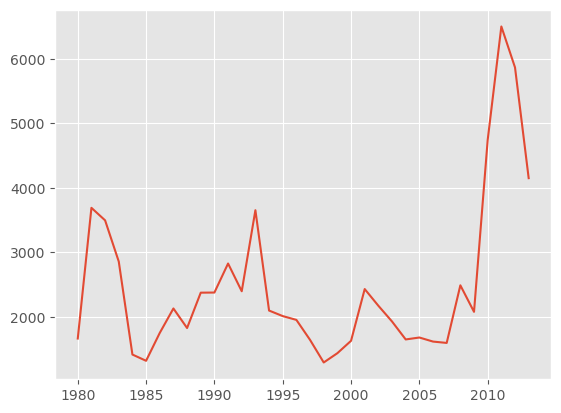

In [72]:
# A simple graph using plot() function
haiti.plot()

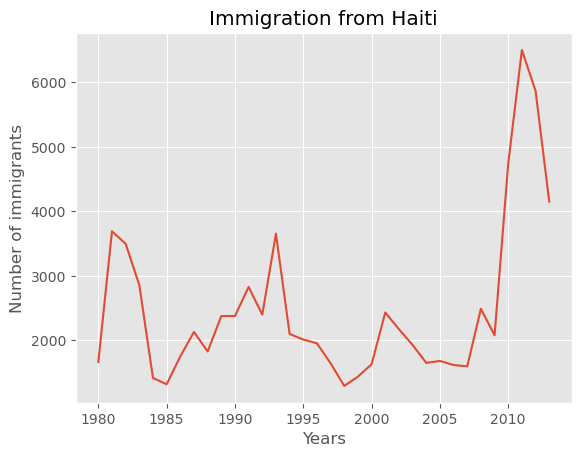

In [74]:
# Let us now decorate the graph 
haiti.index = haiti.index.map(int) # Convert years from string to integers
haiti.plot(kind="line")

plt.title("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")
plt.show()

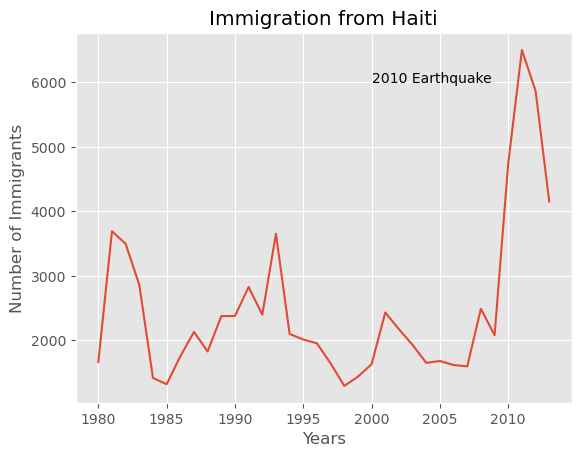

In [75]:
#Provide a piece of information
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

Migration from China and India

In [78]:
#Select migration from only China and India
df_CI = df_can.loc[
    ["China", "India"], years
]
df_CI.head()

Now transpose the table


,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [ ]:
#Now transpose the table
print("Now transpose the table")
df_CI = df_CI.transpose()
df_CI.head()

<AxesSubplot:>

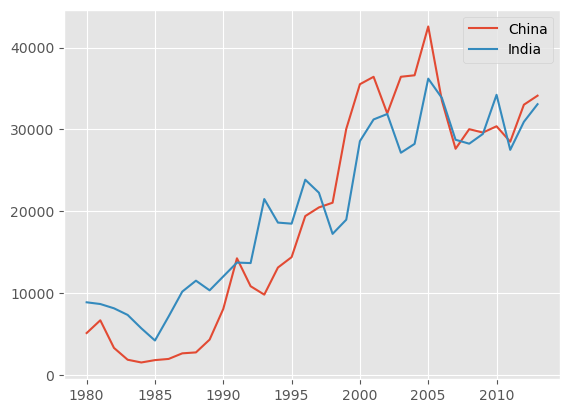

In [79]:
df_CI.plot(kind= "line")

Top 5 countries based on total numbers

In [80]:
#Step 1
df_can.sort_values(by="Total", ascending=False, axis=0, inplace=True)

In [84]:
df_top5 = df_can.head(5)
#Now transpose the table
df_top5 = df_top5[years].transpose()
print(df_top5)

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

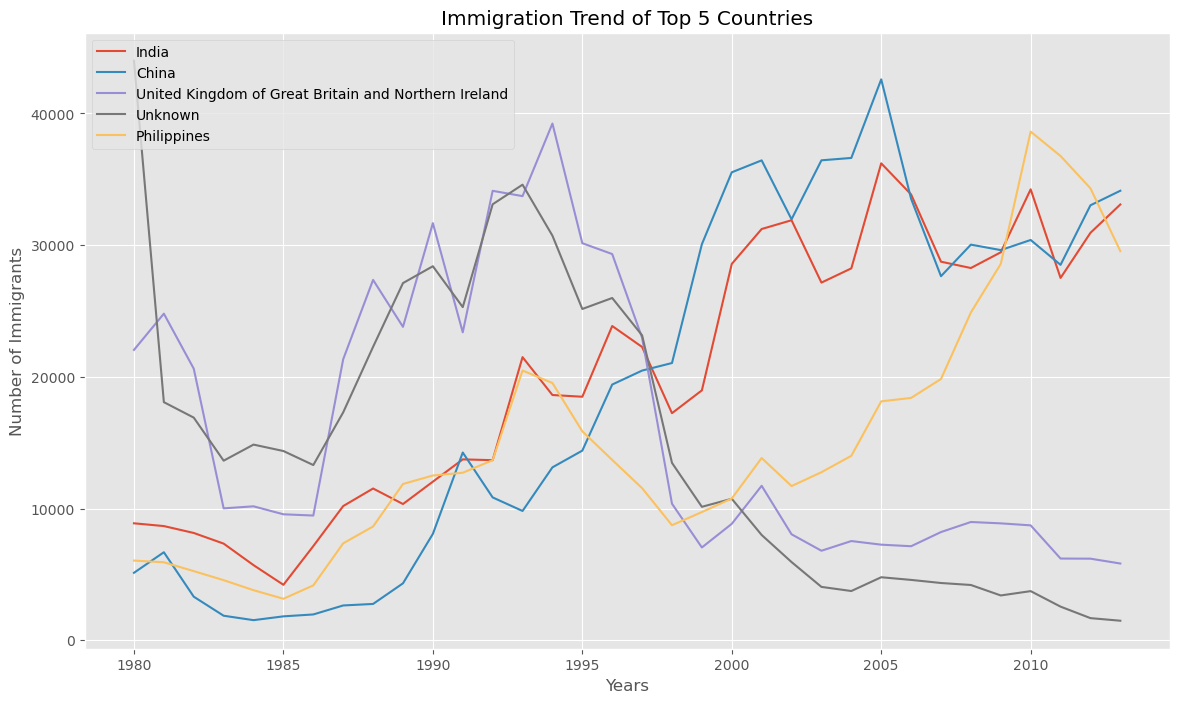

In [85]:
#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind="line", figsize = (14,8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Now let us make the graph more meaningful

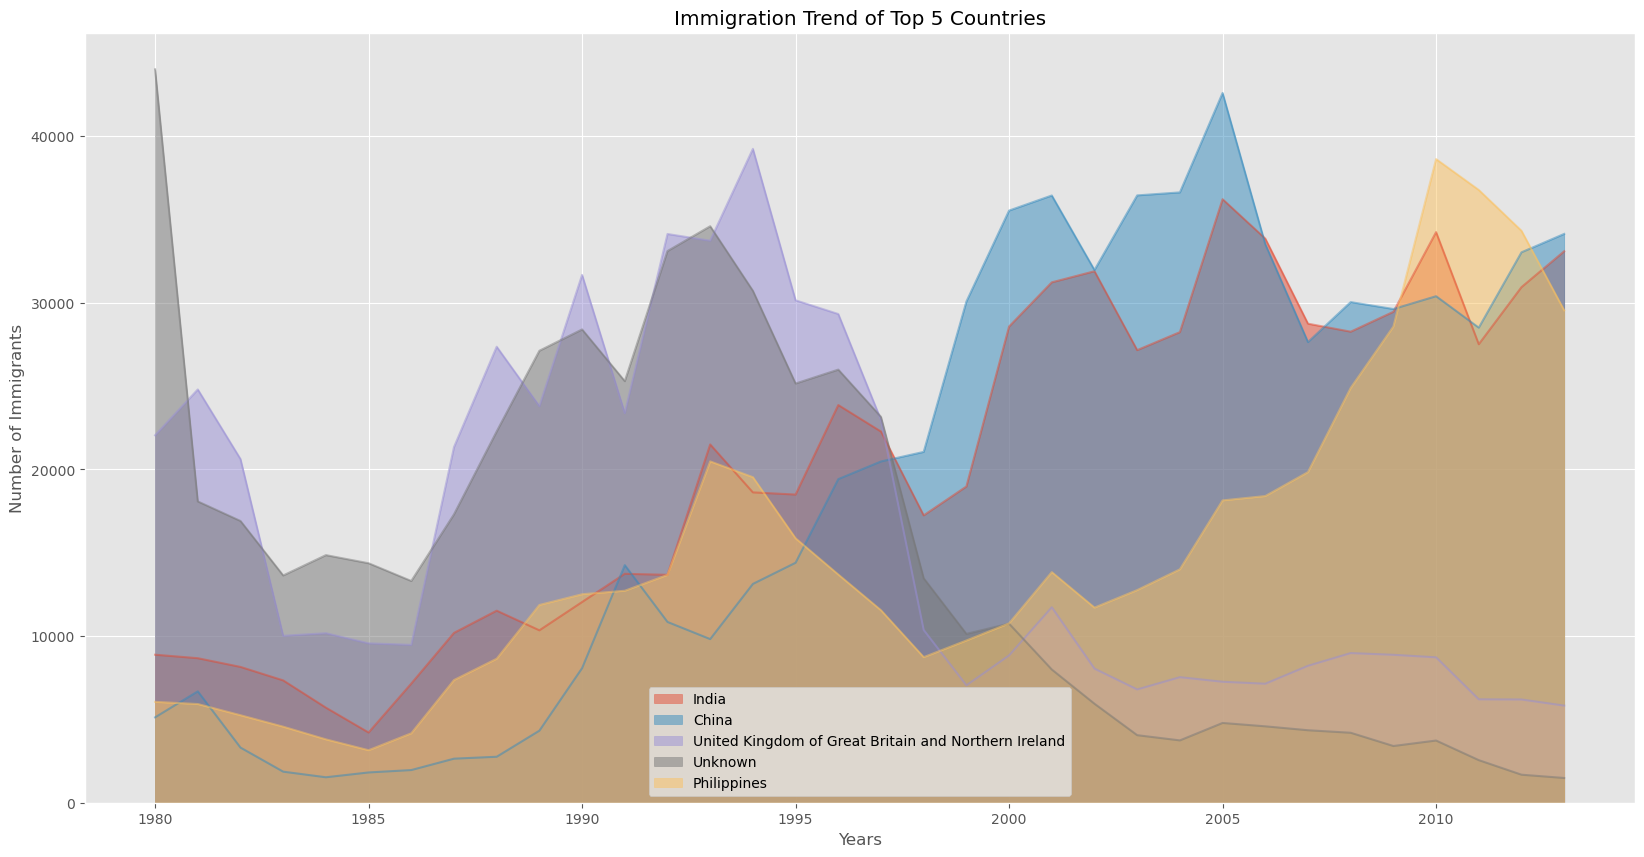

In [86]:
df_top5.plot(
    kind = "area",
    stacked = False,
    figsize = (20,10)
)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

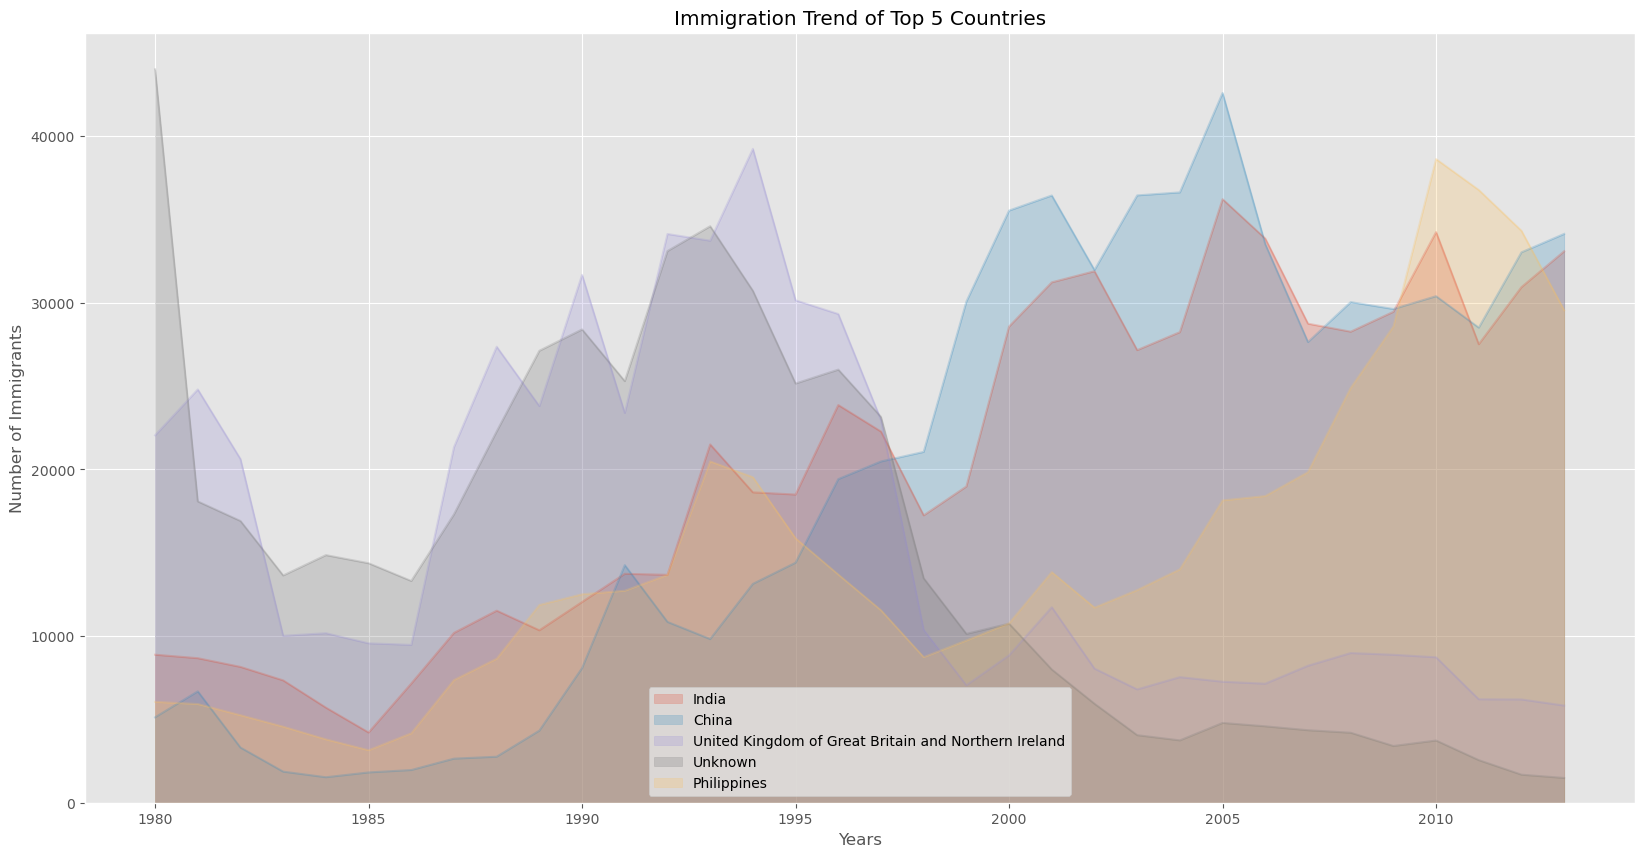

In [87]:
df_top5.plot(kind='area', 
    alpha=0.25, # 0-1, default value a= 0.5
    stacked=False,
    figsize=(20, 10),
)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

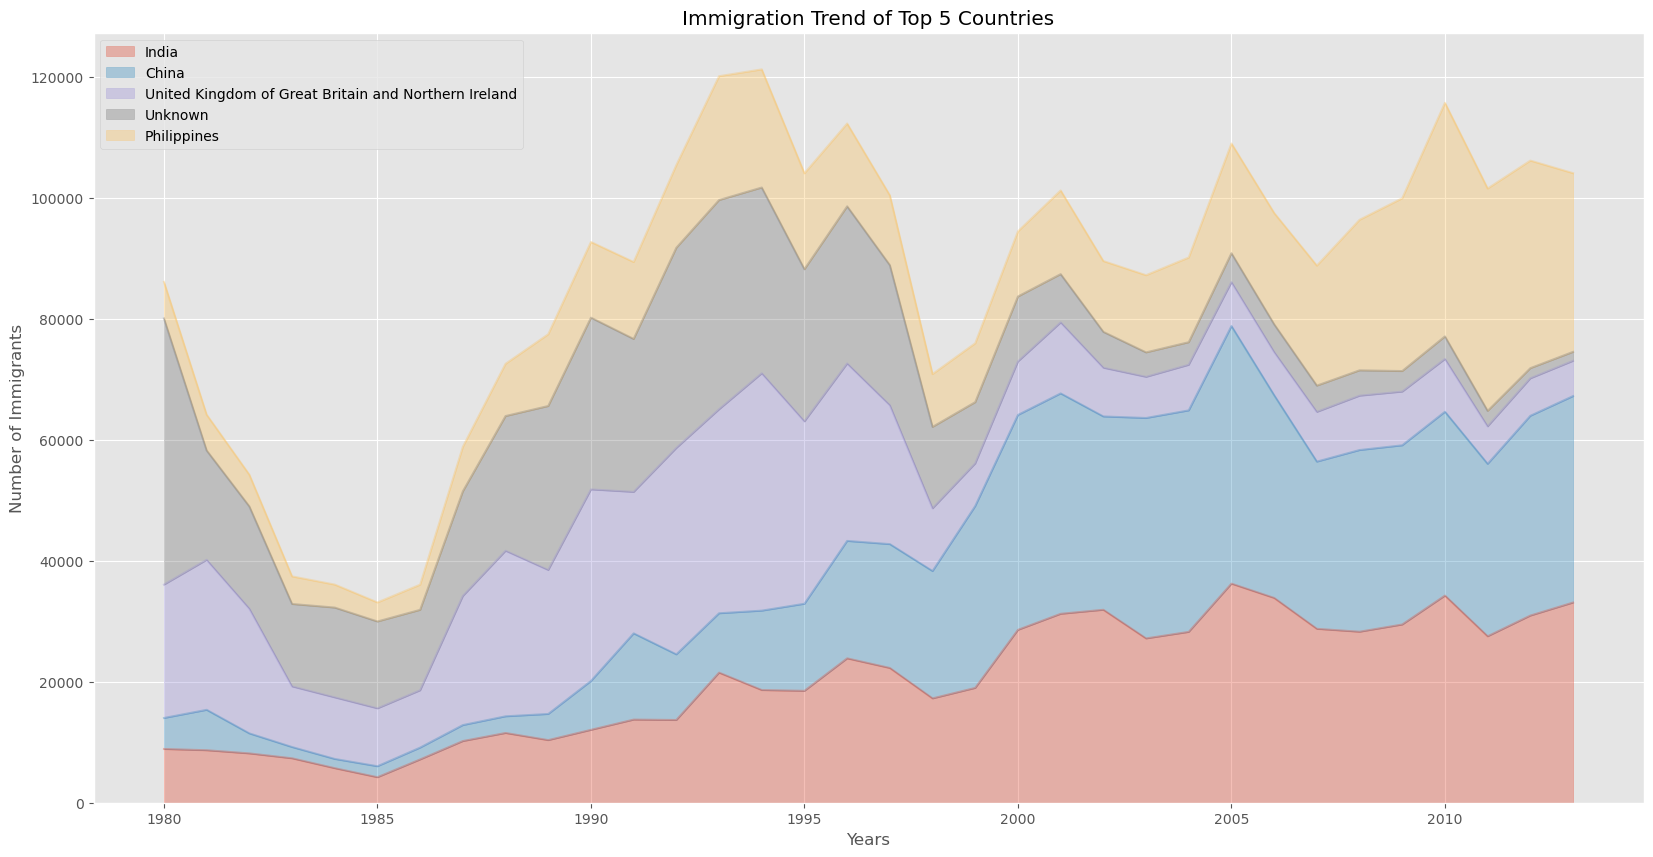

In [88]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Now let us work on the least 5 countries immigrated to Canada

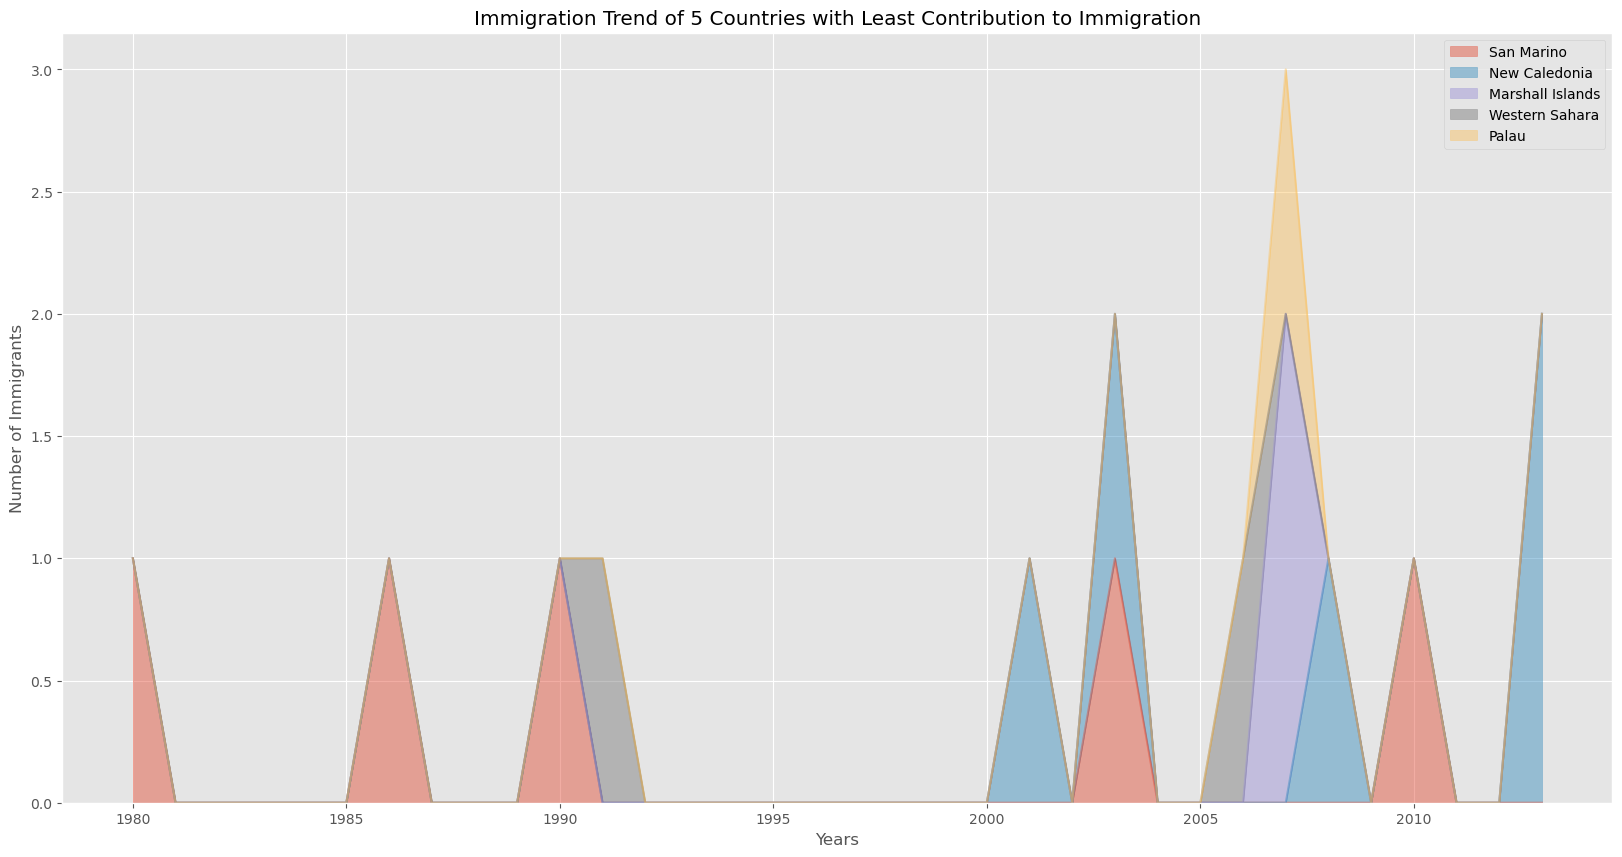

In [90]:
df_least5 = df_can.tail(5)
# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Let us now consider immigration in particular year

In [91]:
df_can["2013"].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Unknown                                                  1484
Philippines                                             29544
Name: 2013, dtype: int64

Let us now generate a histogram

In [93]:
count, bin_edges = np.histogram(df_can["2013"])
print("Counts:", count)
print("Bin edges", bin_edges)

Counts: [179  11   1   2   0   0   0   0   1   2]
Bin edges [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


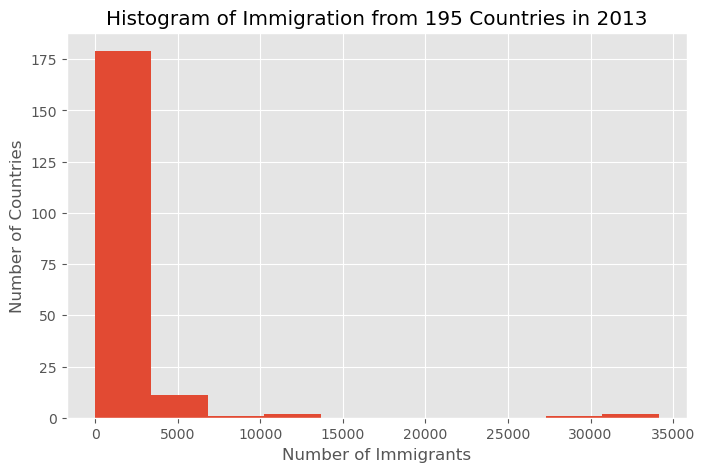

In [94]:
df_can["2013"].plot(kind = "hist", figsize = (8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

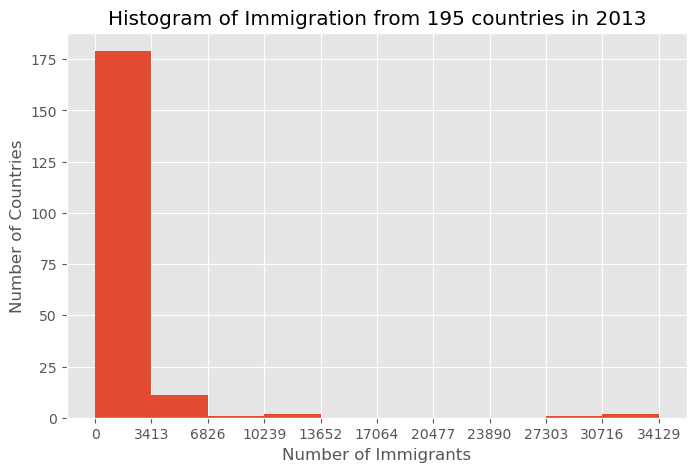

In [95]:
#Change it to bin edges
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Let us now consider immmigration from Denmark, Norway & Sweden


In [96]:
df_scnd = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_scnd.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


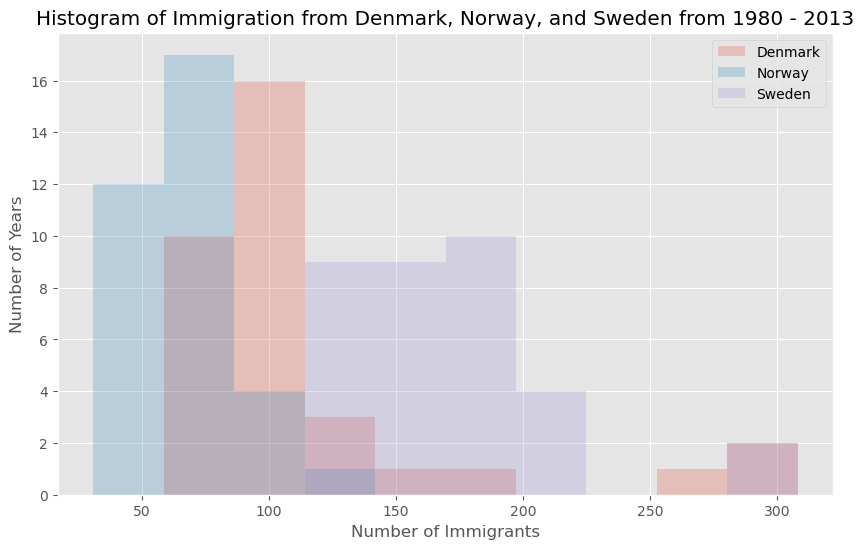

In [98]:
df_scnd.plot(kind="hist", alpha = 0.25, figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

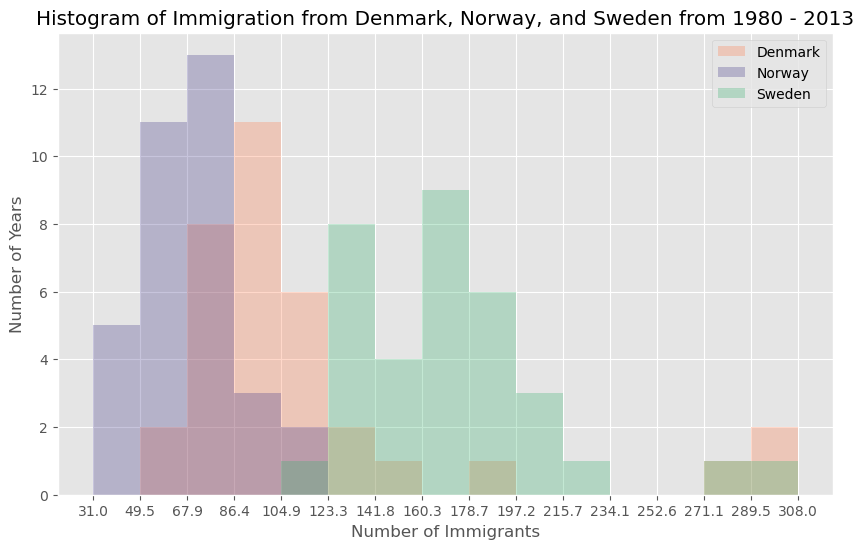

In [100]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_scnd, 15)

# un-stacked histogram
df_scnd.plot(kind ='hist', 
        figsize=(10, 6),
        bins=15,
        alpha=0.3,
        xticks=bin_edges,
        color=['coral', 'darkslateblue', 'mediumseagreen']
        )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

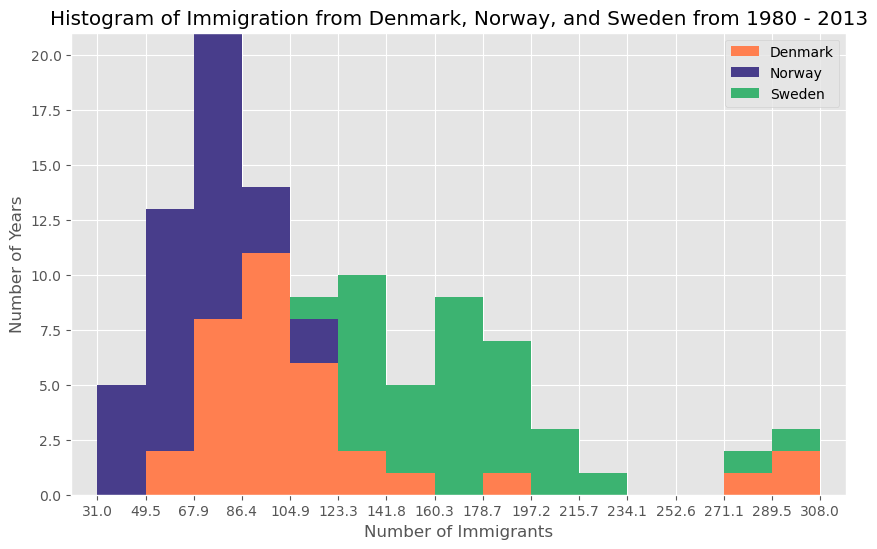

In [101]:
count, bin_edges = np.histogram(df_scnd, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_scnd.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

Now let us analyse the immigration from Iceland

In [102]:
df_iceland = df_can.loc["Iceland", years]

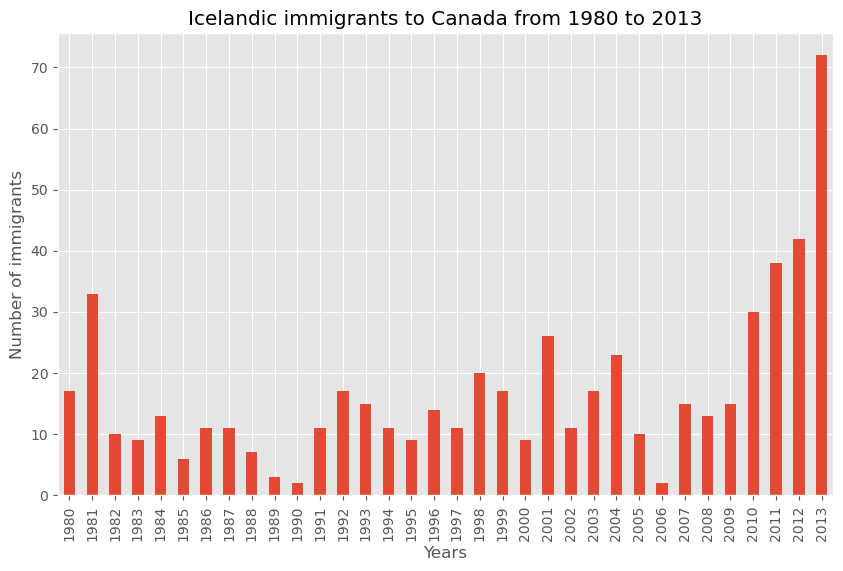

In [103]:
df_iceland.plot(
    kind = "bar",
    figsize = (10,6)
)
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("Icelandic immigrants to Canada from 1980 to 2013")

plt.show()

Now let us annotate some information on the graph

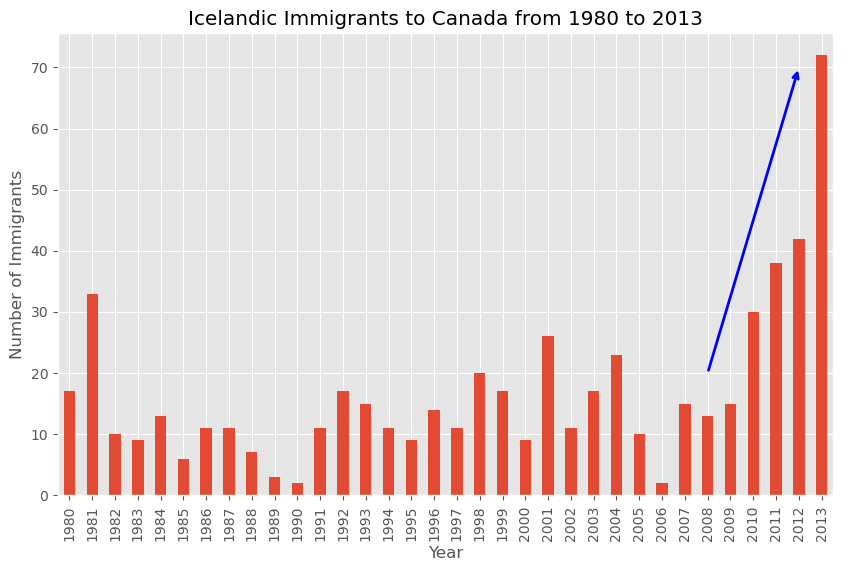

In [104]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
    xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
    xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
    xycoords='data',         # will use the coordinate system of the object being annotated 
    arrowprops=dict(arrowstyle='->', 
    connectionstyle='arc3', 
    color='blue', lw=2)
)

plt.show()

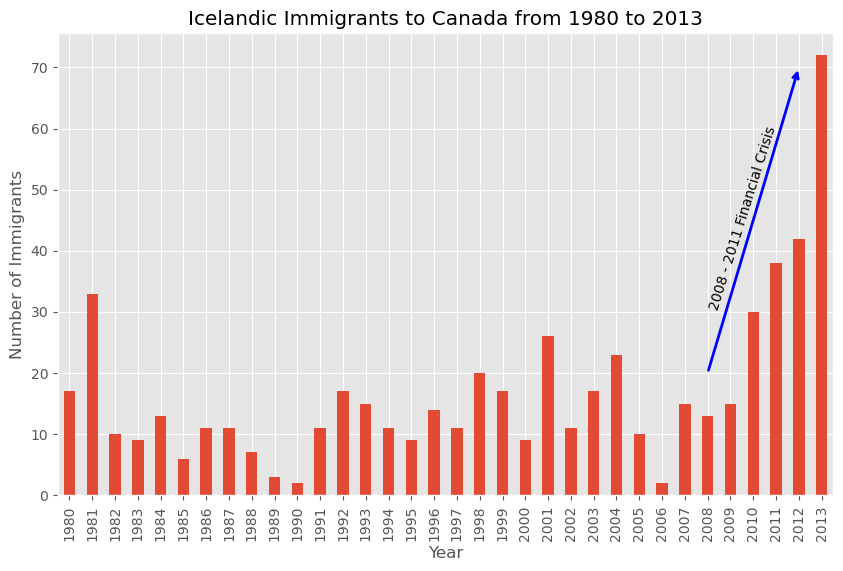

In [105]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

## Total immigration to Canada

In [107]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)
# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
Unknown                                                 515059
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Let us now represent this one graphically with bar charts

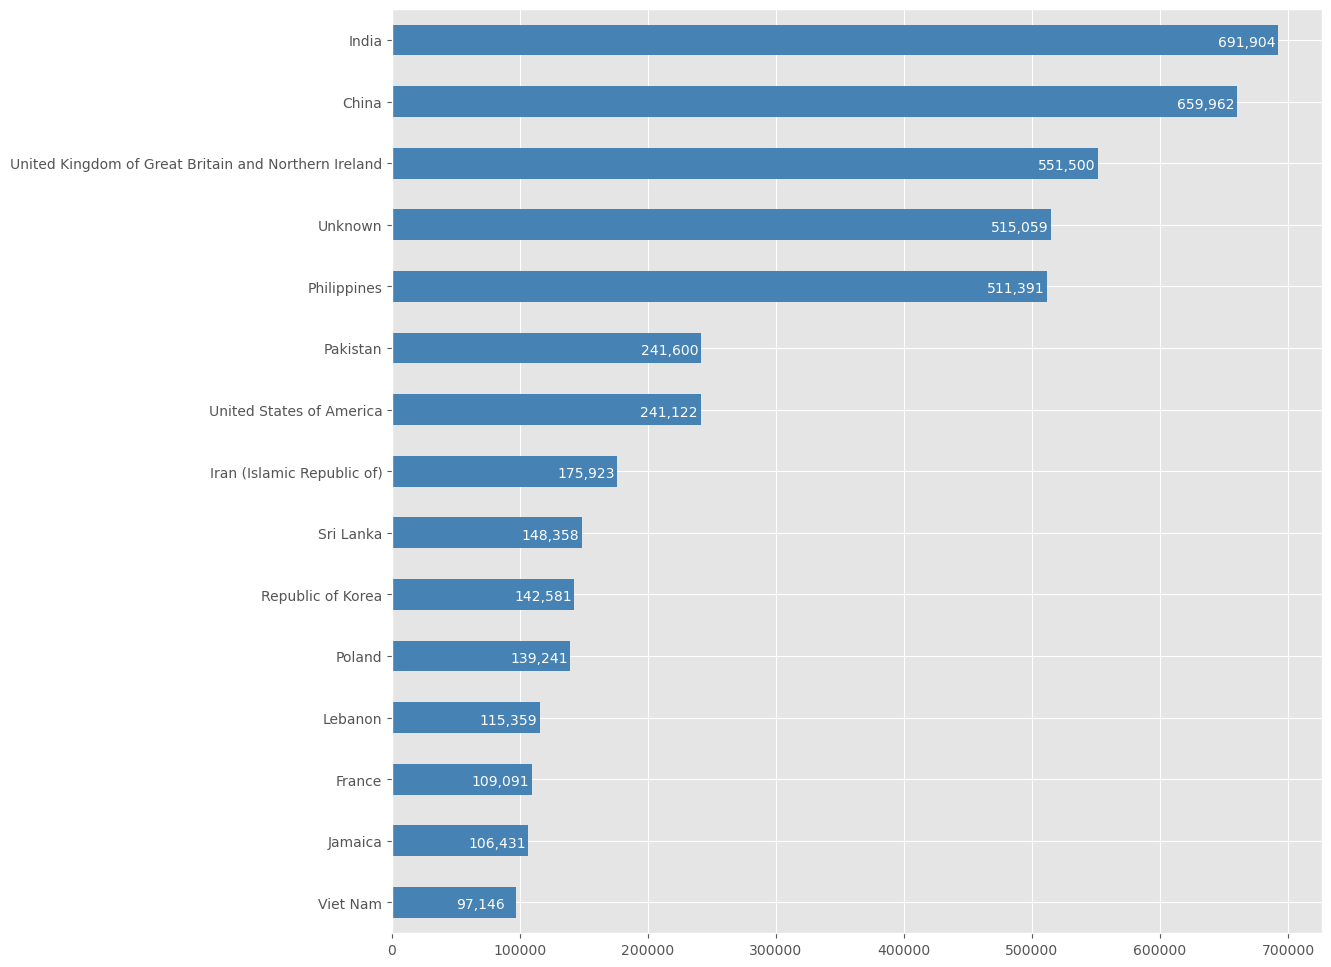

In [109]:
df_top15.plot(
    kind = "barh",
    figsize = (12,12),
    color = "steelblue"
)
# annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ",")
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

## Pie Charts, Box Plots

In [110]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

In [111]:
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
